In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import date2num, DateFormatter
from sklearn.linear_model import LinearRegression
import numpy as np


In [98]:
# df contains epoch data on large models
df = pd.read_csv("Datasets/notable_systems.csv")
# hard contains hardware data over time
hard = pd.read_csv("Datasets/ML_hardware.csv")
# alg contains data from study of algorithmic improvmenents in language models
alg = pd.read_csv("Datasets/Alg_bench.csv")


In [99]:
hard_names = hard.columns.tolist()
print(hard_names)

# format and read hardware datbase
hard["date"] = pd.to_datetime(hard["Release year"].astype(str) + "-01-01")
hard["date_num"] = hard["date"].apply(date2num)

# need computer per dollar column

df = df.dropna(subset=["Inference compute (FLOP)"])
# Sort data by the date to ensure it's in order
df.sort_values("Publication date", inplace=True)

df["date"] = pd.to_datetime(df["Publication date"])
df["date_num"] = df["date"].apply(date2num)


['v', 'Manufacturer', 'FP64 Performance (FLOP/s)', 'FP32 Performance (FLOP/s)', 'FP16 Performance (FLOP/s)', 'FP/TF32 Tensor Performance (FLOP/s)', 'FP16 Tensor Performance (FLOP/s)', 'FP8 Tensor Performance (FLOP/s)', 'INT16 Performance (OP/s)', 'INT8 Tensor Performance (OP/s)', 'INT4 Tensor Performance (OP/s)', 'Memory size per board (Byte)', 'Memory Bandwidth (Byte/s)', 'Type of interconnect (Bus Interface)', 'interconnect speed (in GB/s, bidirectional)', 'Type of specialized point-to-point interconnect', 'Specialized point-to-point interconnect speed (in GB/s, bidirectional)', 'LambdaLabs FP32 ResNet-50 Pytorch Throughput (samples/s)', 'Release date', 'Release year', 'Release price (USD)', 'Cloud pricing ($ per hour) data from 03 July 2023; Google cloud and lambda labs prices', 'Manufacturing Process (Technology Node)', 'Number of transistors in million', 'Die Size in mm^2', 'TDP in W', 'Base Clock in MHz', 'Boost Clock in MHz', 'Memory Clock in MHz', 'Memory bus in bit', 'Shading 

In [100]:

# find all rows that have parameter count less then 1 billion and greater than 1 miilion

alg = alg.dropna(subset=["Parameters"])

# convert to numeric
alg["Parameters"] = pd.to_numeric(alg["Parameters"], errors="coerce")
alg["date"] = pd.to_datetime(alg["Publication date"])
alg["date_num"] = alg["date"].apply(date2num)



condition = (alg["Parameters"] < 1e8) & (alg["Parameters"] > 1e7)
algsmall = alg[condition]
algsmall = algsmall.dropna(subset=["Perplexity (WT103)"])
# algsmalltest = alg[(alg["Parameters"] < 1e6) & (alg["Parameters"] >  1e6)]
# algsmalltest = alg.dropna(subset=["Perplexity (PTB)"])


bigcondition = (alg["Parameters"] > 1e8) & (alg["Parameters"] < 1e9)

# find all rows that have parameters count greater than 1 billion
algbig = alg[bigcondition]
algbig = algbig.dropna(subset=["Perplexity (WT103)"])

In [101]:

# print rows of algsmall
print(algsmall)
# print size of algsmall
print(algsmall.shape)
print(alg.shape, "full shape")

# plot perplexity vs time for algsmall
# algsmall["date"] = pd.to_datetime(algsmall["Publication date"])
# algsmall["date_num"] = algsmall["date"].apply(date2num)

# algbig["date"] = pd.to_datetime(algbig["Publication date"])
# algbig["date_num"] = algbig["date"].apply(date2num)


# create fit for algsmall:
X = algsmall["date_num"].values.reshape(-1, 1)
y = algsmall["Perplexity (WT103)"].values
reg = LinearRegression().fit(X, y)
y_pred_small = reg.predict(X)

slope = reg.coef_[0]
r_squared = reg.score(X, y)
print(f"Slope: {slope}, R^2: {r_squared}")



                                                System   
37                                        LSTM (WT103)  \
89                                 MGK 8 heads (small)   
93                                MGK 4 heads (medium)   
105                        LSTM (Hebbian, Cache, MbPA)   
114                              4 layer QRNN (h=2500)   
132                                             MMLSTM   
142                                    Progressive LRD   
150        AdvSoft + 4 layer QRNN + dynamic evaluation   
153                  4 layer QRNN + dynamic evaluation   
159                             Adaptive LSTM + DeFINE   
182                    Tensorized Transformer (core-2)   
191                                Integer Transformer   
196                                        Shortformer   
205               Tensor-Transformer(1core)+PN (WT103)   
221                                Routing Transformer   
222                                             KnGPT2   
223           

In [102]:
# create fit for algbig
X = algbig["date_num"].values.reshape(-1, 1)
y = algbig["Perplexity (WT103)"].values
reg = LinearRegression().fit(X, y)
y_pred_big = reg.predict(X)

slope = reg.coef_[0]
r_squared = reg.score(X, y)
print(f"Slope for Large Models: {slope}, R^2: {r_squared}")



Slope for Large Models: -0.00963531888938988, R^2: 0.10670848059798477


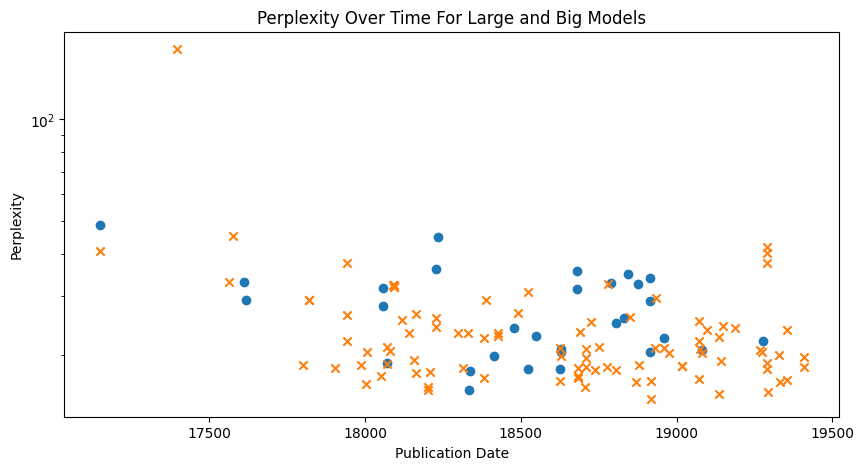

In [103]:
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.scatter(
    algsmall["date_num"], algsmall["Perplexity (WT103)"], marker="o"
)  # Line plot with markers
plt.scatter(algbig["date_num"], algbig["Perplexity (WT103)"], marker="x")
# plt.yscale("log")
# plt.plot(algsmall["date_num"], y_pred_small, color="b", label="Linear Fit (PTB)")
# plt.plot(algbig["date_num"], y_pred_big, color="r", label="Linear Fit (WT2)")
plt.ylabel("Perplexity")
plt.xlabel("Publication Date")
plt.title("Perplexity Over Time For Large and Big Models")
plt.yscale("log")






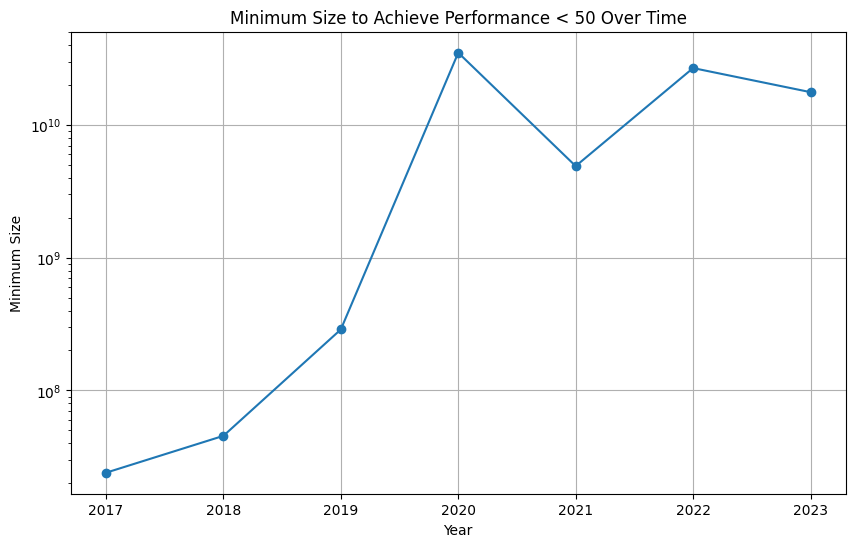

In [104]:


alg = alg.dropna(subset=["Perplexity (PTB)"])
# Filter the data for performance > 50 and find the minimum size for each year
filtered_df = alg[(alg['Perplexity (PTB)'] < 70) & (alg['Perplexity (PTB)'] < 50)]


min_size_per_year = filtered_df.groupby('Year')['Parameters'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(min_size_per_year['Year'], min_size_per_year['Parameters'], marker='o', linestyle='-')
plt.title('Minimum Size to Achieve Performance < 50 Over Time')
plt.xlabel('Year')
plt.ylabel('Minimum Size')
plt.yscale('log')
plt.grid(True)
plt.show()






['v', 'Manufacturer', 'FP64 Performance (FLOP/s)', 'FP32 Performance (FLOP/s)', 'FP16 Performance (FLOP/s)', 'FP/TF32 Tensor Performance (FLOP/s)', 'FP16 Tensor Performance (FLOP/s)', 'FP8 Tensor Performance (FLOP/s)', 'INT16 Performance (OP/s)', 'INT8 Tensor Performance (OP/s)', 'INT4 Tensor Performance (OP/s)', 'Memory size per board (Byte)', 'Memory Bandwidth (Byte/s)', 'Type of interconnect (Bus Interface)', 'interconnect speed (in GB/s, bidirectional)', 'Type of specialized point-to-point interconnect', 'Specialized point-to-point interconnect speed (in GB/s, bidirectional)', 'LambdaLabs FP32 ResNet-50 Pytorch Throughput (samples/s)', 'Release date', 'Release year', 'Release price (USD)', 'Cloud pricing ($ per hour) data from 03 July 2023; Google cloud and lambda labs prices', 'Manufacturing Process (Technology Node)', 'Number of transistors in million', 'Die Size in mm^2', 'TDP in W', 'Base Clock in MHz', 'Boost Clock in MHz', 'Memory Clock in MHz', 'Memory bus in bit', 'Shading 

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_43136/2034578865.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricedata["Price"] = pricedata[
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_43136/2034578865.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricedata["Price"] = pd.to_numeric(pricedata["Price"])
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_43136/2034578865.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Text(0.5, 0, 'Hardware Release Date')

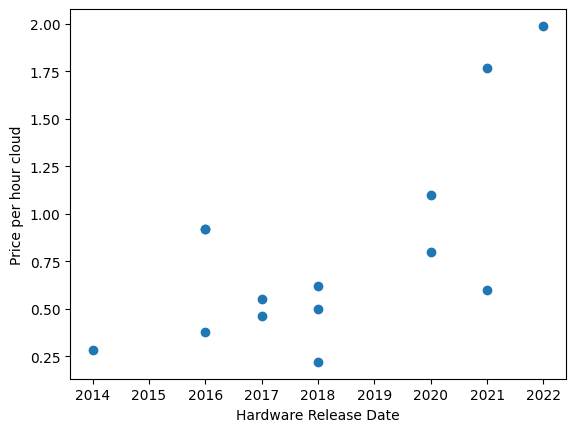

In [105]:


# tracking price of compute for GPU's over time
print(hard.columns.tolist())
pricedata = hard.dropna(
    subset=[
        "Cloud pricing ($ per hour) data from 03 July 2023; Google cloud and lambda labs prices"
    ]
)


pricedata["Price"] = pricedata[
    "Cloud pricing ($ per hour) data from 03 July 2023; Google cloud and lambda labs prices"
].replace({"\$": "", ",": ""}, regex=True)

# Step 3: Convert to numeric
pricedata["Price"] = pd.to_numeric(pricedata["Price"])
pricedata["Price/s"] = pricedata["Price"] / 3600

pricedata["date"] = pd.to_datetime(pricedata["Release year"].astype(str) + "-01-01")
plt.scatter(pricedata["date"], pricedata["Price"], marker="o")
plt.ylabel("Price per hour cloud")
plt.xlabel("Hardware Release Date")



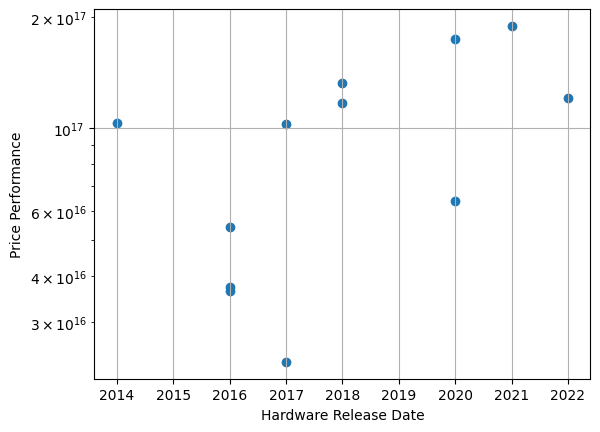

In [106]:
# get price performance data
pricedata = pricedata.dropna(subset=["FP32 Performance (FLOP/s)"])
pricedata["Price Performance"] = (
    pricedata["FP32 Performance (FLOP/s)"] / pricedata["Price/s"]
)
plt.scatter(pricedata["date"], pricedata["Price Performance"], marker="o")
plt.ylabel("Price Performance")
plt.xlabel("Hardware Release Date")
plt.grid(True)
plt.yscale("log")

   year          size
0  2017  1.200000e+10
1  2018  1.270000e+10
2  2019  1.980000e+10
3  2020  2.540000e+10
4  2021  3.350000e+10


Text(0.5, 1.0, 'Spending on GPU Compute Over Time')

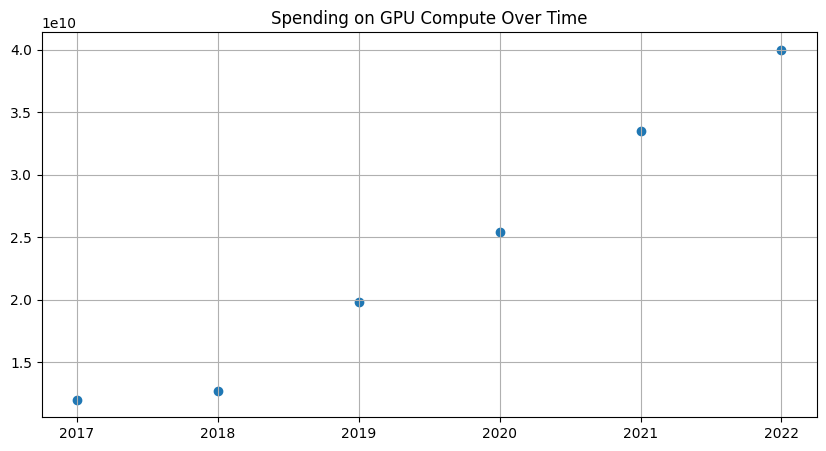

In [107]:
# make graphs of each time of overhang measure
# this includes dollars needed for given level of performance
# this also includes total ration of total compute/lowest inference cost for given performance


# world total compute esimates
total = pd.read_csv("WorldTotalCompute.csv")
print(total.head())
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.scatter(total["year"], total["size"], marker="o")  # Line plot with markers
plt.grid(True)
plt.title("Spending on GPU Compute Over Time")  # Title of the plot



In [114]:
pricedata.columns.tolist()

['v',
 'Manufacturer',
 'FP64 Performance (FLOP/s)',
 'FP32 Performance (FLOP/s)',
 'FP16 Performance (FLOP/s)',
 'FP/TF32 Tensor Performance (FLOP/s)',
 'FP16 Tensor Performance (FLOP/s)',
 'FP8 Tensor Performance (FLOP/s)',
 'INT16 Performance (OP/s)',
 'INT8 Tensor Performance (OP/s)',
 'INT4 Tensor Performance (OP/s)',
 'Memory size per board (Byte)',
 'Memory Bandwidth (Byte/s)',
 'Type of interconnect (Bus Interface)',
 'interconnect speed (in GB/s, bidirectional)',
 'Type of specialized point-to-point interconnect',
 'Specialized point-to-point interconnect speed (in GB/s, bidirectional)',
 'LambdaLabs FP32 ResNet-50 Pytorch Throughput (samples/s)',
 'Release date',
 'Release year',
 'Release price (USD)',
 'Cloud pricing ($ per hour) data from 03 July 2023; Google cloud and lambda labs prices',
 'Manufacturing Process (Technology Node)',
 'Number of transistors in million',
 'Die Size in mm^2',
 'TDP in W',
 'Base Clock in MHz',
 'Boost Clock in MHz',
 'Memory Clock in MHz',
 '

                         v Manufacturer  FP64 Performance (FLOP/s)   
5          NVIDIA H100 SXM       NVIDIA               3.350000e+13  \
11             NVIDIA A10G       NVIDIA               9.850000e+11   
13             NVIDIA A100       NVIDIA               9.750000e+12   
15        NVIDIA RTX A6000       NVIDIA               1.210000e+12   
20               NVIDIA T4       NVIDIA               2.540000e+11   
23  NVIDIA Quadro RTX 6000       NVIDIA               5.100000e+11   
26  NVIDIA Tesla V100 SMX2       NVIDIA               7.800000e+12   
27           Google TPU V2       Google                        NaN   
30             NVIDIA P100       NVIDIA               4.700000e+12   
31         NVIDIA Tesla P4       NVIDIA               1.780000e+11   
41        NVIDIA Tesla K80       NVIDIA               2.740000e+12   
47   NVIDIA P100 PCIe 16GB       NVIDIA               4.700000e+12   

    FP32 Performance (FLOP/s)  FP16 Performance (FLOP/s)   
5                6.690000e+13

KeyError: 'GPU Price Performance'

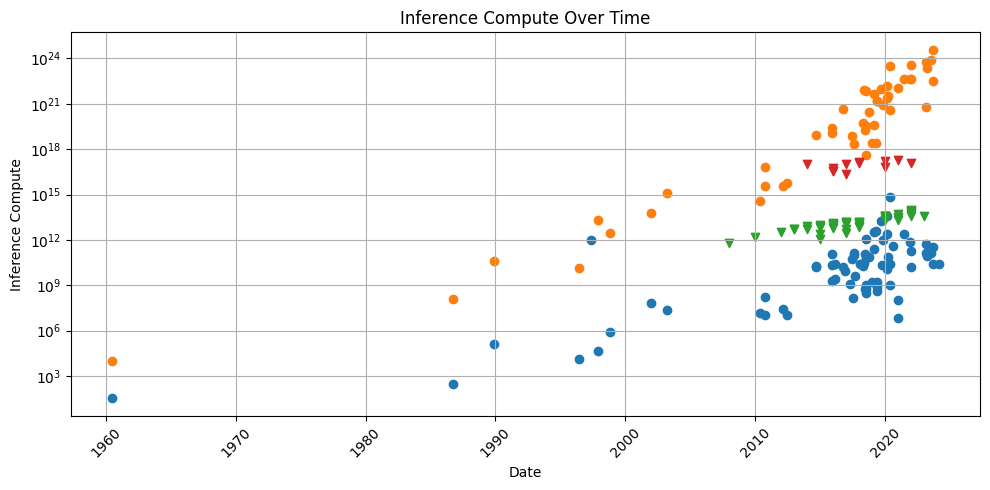

In [115]:
# Plotting the data
plt.figure(figsize=(10, 5))  # Set the size of the plot
plt.scatter(
    df["date_num"], df["Inference compute (FLOP)"], marker="o", label = "SOTA Inference compute (FLOP)"
)  # Line plot with markers
plt.scatter(df["date_num"], df["Training compute (FLOP)"], marker="o", label=" SOTA Training compute (FLOP)")
plt.scatter(hard["date_num"], hard["FP32 Performance (FLOP/s)"], marker="v", label="GPU Performance FP32 Performance (FLOP/s)")
plt.scatter(pricedata["date"], pricedata["Price Performance"], marker="v", label="Price Performance Flop/$")

plt.title("Inference Compute Over Time")  # Title of the plot
plt.xlabel("Date")  # Label for the x-axis
plt.ylabel("Inference Compute")  # Label for the y-axis
plt.yscale("log")
plt.grid(True)  # Add grid for better readability
plt.xticks(rotation=45)  # Rotate date labels for better visibility

#     [
#         "Inference compute (FLOP)",
#         "Training compute (FLOP)",
#         "FP32 Performance (FLOP/s)",
#         "Price Performance",
#     ]
# )

plt.tight_layout()  # Adjust layout to not cut off labels
# make linear fit fro price performance
#
print(pricedata)

X = pricedata["date_num"].values.reshape(-1, 1)
y = np.log(pricedata["GPU Price Performance"].values)
reg = LinearRegression().fit(X, y)

y_pred_price = np.exp(reg.predict(X))

# graph the fit
# plt.plot(
#     pricedata["date_num"],
#     y_pred_price,
#     color="r",
#     label="Linear Fit (Price Performance)",
# )

# Predict price performance for the years in the total compute dataset
predictpricep = np.exp(reg.predict(total["year"].values.reshape(-1, 1)))

# Divide total compute by predicted price performance
# total GPU investment seems to double every year account for geometric growth
# the total stock of GPU is twice current sale
# total_correction = (2**(-.75))/(1-2**-.25)
total["World Flop/s"] = total["size"] * predictpricep





#adjustment for decay

# convert year to datetime
total["date"] = pd.to_datetime(total["year"].astype(str) + "-01-01")
plt.scatter(total["date"], total["World Flop/s"], marker="v", color="purple", label="World Total GPU Compute Flop/s")
#increase the lengend size
plt.legend(prop={"size": 15})
# plt.legend(
plt.show()

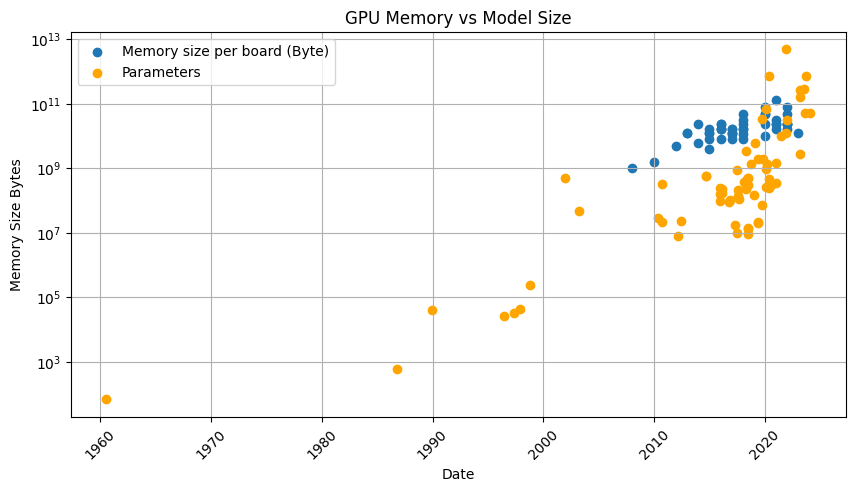

In [69]:

# memory size plot
plt.figure(figsize=(10, 5))  # Set the size of the plot

# df["date"] = pd.to_datetime(df["date_num"])
# df["date_num"] = df["date"].apply(date2num)

# hard["date"] = pd.to_datetime(hard["date_num"])
# hard["date_num"] = hard["date"].apply(date2num)
plt.scatter(
    hard["date"], hard["Memory size per board (Byte)"], marker="o"
)  # Line plot with markers
plt.scatter(df["date"], 4*df["Parameters"], marker="o", color="orange", label="SOTA Parameter Memory in FP32")

#labels are still in unix time
plt.grid(True)  # Add grid for better readability
plt.legend(["Memory size per board (Byte)", "Parameters"])
plt.xlabel("Date")  # Label for the x-axis
plt.ylabel("Memory Size Bytes")  # Label for the y-axis
plt.yscale("log")
plt.title("GPU Memory vs Model Size")
plt.xticks(rotation=45) 
plt.show()  # Display the plot

#labels are still in unix time 
# need to convert to datetime


# Set the x-ticks to display the year every five years
# start_date = df["date"].min().year
# end_date = df["date"].max().year
# plt.xticks(pd.date_range(start=f"{start_date}-01-01", end=f"{end_date}-01-01", freq='5Y').to_pydatetime())



In [ ]:


# graph performance/model size by year 

